Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Load Netflix data ("NetflixViewingHistory.csv") into a Pandas dataframe and view it

In [2]:
#1. Download Netflix data "NetflixViewingHistory.csv"
#2. Take a look at 

Netflix_data = pd.read_csv('NetflixViewingHistory.csv')
display(Netflix_data)

,Title,Date
0,Russian Doll: Season 2: Station to Station,5/4/22
1,Russian Doll: Season 2: Brain Drain,5/3/22
2,Russian Doll: Season 2: Coney Island Baby,4/26/22
3,Russian Doll: Season 2: Nowhen,4/26/22
4,Eternally Confused and Eager for Love: Season ...,4/10/22
...,...,...
1967,The OA: Part I: Chapter 4: Away,12/22/16
1968,The OA: Part I: Chapter 3: Champion,12/22/16
1969,The OA: Part I: Chapter 2: New Colossus,12/22/16
1970,The OA: Part I: Chapter 1: Homecoming,12/22/16


What is the features of the dataframe (number of entries, number of columns and names of each column)?

In [3]:
# How many entries(rows) are in the data?

Netflix_data.shape[0]


1972

In [4]:
# How many columns are in the data?

Netflix_data.shape[1]

2

In [5]:
# What are the names of the first and second columns in the data?

for column in Netflix_data.columns:
    print(column)


Title
Date


How many times was an episode of the show Designated Survivor watched according to the data?

In [6]:
# 1a. Get just the titles
# 1b. Use .apply()to determine whether each title contains "Designated Survivor"
# 1c. Sum up how many titles contain the keyword

Netflix_data['Title'].apply(lambda title: 'Designated Survivor' in title).sum()

10

When was the first episode of the "Bridgerton" watched?

In [7]:
# a. Using .loc[], zoom in on the entries containing "Bridgerton" in the title
# b. Sort by the date
# c. Get just the dates
# d. Using .iloc[], get the latest date

Netflix_data.loc[['Bridgerton' in title for title in Netflix_data['Title']], :].sort_values('Date')['Date'].iloc[0]

'1/8/21'

What is the title of the first episode of the show "Bridgerton" watched?

In [8]:
# a. Zoom in on entries containing "Bridgerton" in the title
# b. Sort by the date 
# c. Get just the titles
# d. Get the latest title

Netflix_data.loc[['Bridgerton' in title for title in Netflix_data['Title']], :].sort_values('Date')['Title'].iloc[0]

'Bridgerton: Season 1: An Affair of Honor'

When was the last episode of the "Bridgerton" watched?

In [9]:

Netflix_data.loc[['Bridgerton' in title for title in Netflix_data['Title']], :].sort_values('Date')['Date'].iloc[-1]

'4/4/22'

What is the title of the last episode of "Bridgerton" watched?

In [10]:


Netflix_data.loc[['Bridgerton' in title for title in Netflix_data['Title']], :].sort_values('Date')['Title'].iloc[-1]

'Bridgerton: Season 2: The Viscount Who Loved Me'

The next few lines of code, contain steps followed to create and add a new column to a copy of the dataframe that tells us what cataegory an entry falls into (is it a "Movie" or a "Show"?)

* "Season" and "Chapter" are the main keywords indicating that a title is from a show

In [11]:
# Step 1. Make a copy of the original netflix data named "Netflix_dataCopy"

Netflix_dataCopy = Netflix_data.copy()

In [12]:
# Step 2a. Create a new column "Category" that contains a boolean value depending on whether a title is identified as a Show or not.
# Step 2b. Using .apply(), identify whether each title is a show
# Step 2c. View your dataframe

Netflix_dataCopy["Category"] = Netflix_data["Title"].apply(lambda title: "Season" in title or "Chapter" in title)
Netflix_dataCopy

,Title,Date,Category
0,Russian Doll: Season 2: Station to Station,5/4/22,True
1,Russian Doll: Season 2: Brain Drain,5/3/22,True
2,Russian Doll: Season 2: Coney Island Baby,4/26/22,True
3,Russian Doll: Season 2: Nowhen,4/26/22,True
4,Eternally Confused and Eager for Love: Season ...,4/10/22,True
...,...,...,...
1967,The OA: Part I: Chapter 4: Away,12/22/16,True
1968,The OA: Part I: Chapter 3: Champion,12/22/16,True
1969,The OA: Part I: Chapter 2: New Colossus,12/22/16,True
1970,The OA: Part I: Chapter 1: Homecoming,12/22/16,True


In [13]:
Netflix_dataCopy['Category'].dtype

dtype('bool')

In [14]:
# Step 3. Convert the data type of the "Category" column to string to allow use of logical operations

Netflix_dataCopy["Category"] = Netflix_dataCopy["Category"].map({True: 'True', False: "False"})
Netflix_dataCopy["Category"].dtypes

dtype('O')

In [15]:
# Step 4a. Create an empty list named "type"
# Step 4b. Populate the list with the type of film (show or movie) for each entity by iterating over each row of and appending "Show" if the Category is True and "Movie" if it is not


type = []
for row in Netflix_dataCopy["Category"]:
    if row == 'True':
        type.append('Show')
    else:
        type.append("Movie")

print(type)
        
       

['Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Movie', 'Show', 'Show', 'Movie', 'Movie', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Movie', 'Movie', 'Movie', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Movie', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Movie', 'Show', 'Show', 'Movie', 'Movie', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Movie', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Show', 'Sho

In [16]:
# import Counter fron collections
# Count the number of unique value

from collections import Counter
print(Counter(type))


Counter({'Show': 1781, 'Movie': 191})


In [17]:
# Step 5. Add a new column named "Movie Type" to the dataframe that is populated with the list "type"

Netflix_dataCopy["Movie Type"] = type
display(Netflix_dataCopy)

,Title,Date,Category,Movie Type
0,Russian Doll: Season 2: Station to Station,5/4/22,True,Show
1,Russian Doll: Season 2: Brain Drain,5/3/22,True,Show
2,Russian Doll: Season 2: Coney Island Baby,4/26/22,True,Show
3,Russian Doll: Season 2: Nowhen,4/26/22,True,Show
4,Eternally Confused and Eager for Love: Season ...,4/10/22,True,Show
...,...,...,...,...
1967,The OA: Part I: Chapter 4: Away,12/22/16,True,Show
1968,The OA: Part I: Chapter 3: Champion,12/22/16,True,Show
1969,The OA: Part I: Chapter 2: New Colossus,12/22/16,True,Show
1970,The OA: Part I: Chapter 1: Homecoming,12/22/16,True,Show


In [18]:
Netflix_dataCopy

,Title,Date,Category,Movie Type
0,Russian Doll: Season 2: Station to Station,5/4/22,True,Show
1,Russian Doll: Season 2: Brain Drain,5/3/22,True,Show
2,Russian Doll: Season 2: Coney Island Baby,4/26/22,True,Show
3,Russian Doll: Season 2: Nowhen,4/26/22,True,Show
4,Eternally Confused and Eager for Love: Season ...,4/10/22,True,Show
...,...,...,...,...
1967,The OA: Part I: Chapter 4: Away,12/22/16,True,Show
1968,The OA: Part I: Chapter 3: Champion,12/22/16,True,Show
1969,The OA: Part I: Chapter 2: New Colossus,12/22/16,True,Show
1970,The OA: Part I: Chapter 1: Homecoming,12/22/16,True,Show


 Create a pie chart to show what proportion of the Netflix Viewings belonged to "Shows" and "Movies"

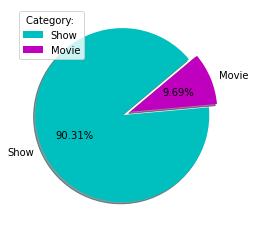

In [19]:
labels = ['Show', 'Movie']
count = [1781, 191]
my_explode = [0,0.1]
plt.pie(count, labels = labels, autopct = '%1.2f%%', startangle = 40, explode = my_explode, shadow = True, colors = ['c','m'])
plt.legend(title = "Category: ")
plt.show()